In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

2022-12-28 15:02:39.001442: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-28 15:02:39.252152: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-28 15:02:39.329465: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-28 15:02:39.329486: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

--2022-12-28 15:03:09--  https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70702765 (67M) [application/zip]
Saving to: ‘cats_and_dogs.zip’

cats_and_dogs.zip   100%[===================>]  67.43M  1.97MB/s    in 33s     

2022-12-28 15:03:43 (2.03 MB/s) - ‘cats_and_dogs.zip’ saved [70702765/70702765]

Archive:  cats_and_dogs.zip
   creating: cats_and_dogs/
  inflating: cats_and_dogs/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/cats_and_dogs/
  inflating: __MACOSX/cats_and_dogs/._.DS_Store  
   creating: cats_and_dogs/test/
  inflating: cats_and_dogs/test/48.jpg  
   creating: __MACOSX/cats_and_dogs/test/
  inflating: __MACOSX/cats_and_dogs/test/._48.jpg  
  inflating: cats_and_dogs/test/49.jpg  
  inflating:

  inflating: cats_and_dogs/train/dogs/dog.21.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.21.jpg  
  inflating: cats_and_dogs/train/dogs/dog.158.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.158.jpg  
  inflating: cats_and_dogs/train/dogs/dog.35.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.35.jpg  
  inflating: cats_and_dogs/train/dogs/dog.819.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.819.jpg  
  inflating: cats_and_dogs/train/dogs/dog.831.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.831.jpg  
  inflating: cats_and_dogs/train/dogs/dog.825.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.825.jpg  
  inflating: cats_and_dogs/train/dogs/dog.824.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.824.jpg  
  inflating: cats_and_dogs/train/dogs/dog.830.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.830.jpg  
  inflating: cats_and_dogs/train/dogs/dog.818.jpg  
  inflating: __MACOSX/cats_and_d

  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.729.jpg  
  inflating: cats_and_dogs/train/dogs/dog.926.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.926.jpg  
  inflating: cats_and_dogs/train/dogs/dog.932.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.932.jpg  
  inflating: cats_and_dogs/train/dogs/dog.503.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.503.jpg  
  inflating: cats_and_dogs/train/dogs/dog.265.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.265.jpg  
  inflating: cats_and_dogs/train/dogs/dog.271.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.271.jpg  
  inflating: cats_and_dogs/train/dogs/dog.517.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.517.jpg  
  inflating: cats_and_dogs/train/dogs/dog.259.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.259.jpg  
  inflating: cats_and_dogs/train/dogs/dog.477.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.477.jpg  
  inflating: cats

  inflating: cats_and_dogs/train/dogs/dog.119.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.119.jpg  
  inflating: cats_and_dogs/train/dogs/dog.74.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.74.jpg  
  inflating: cats_and_dogs/train/dogs/dog.60.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_d

  inflating: cats_and_dogs/train/dogs/dog.295.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.295.jpg  
  inflating: cats_and_dogs/train/dogs/dog.281.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.281.jpg  
  inflating: cats_and_dogs/train/dogs/dog.478.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.478.jpg  
  inflating: cats_and_dogs/train/dogs/dog.322.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.322.jpg  
  inflating: cats_and_dogs/train/dogs/dog.444.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.444.jpg  
  inflating: cats_and_dogs/train/dogs/dog.450.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.450.jpg  
  inflating: cats_and_dogs/train/dogs/dog.336.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.336.jpg  
  inflating: cats_and_dogs/train/dogs/dog.487.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.487.jpg  
  inflating: cats_and_dogs/train/dogs/dog.493.jpg  
  inflating: __MACOSX/cats_a

  inflating: cats_and_dogs/train/dogs/dog.626.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.626.jpg  
  inflating: cats_and_dogs/train/dogs/dog.140.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.140.jpg  
  inflating: cats_and_dogs/train/dogs/dog.815.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.815.jpg  
  inflating: cats_and_dogs/train/dogs/dog.801.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.801.jpg  
  inflating: cats_and_dogs/train/dogs/dog.197.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.197.jpg  
  inflating: cats_and_dogs/train/dogs/dog.829.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.829.jpg  
  inflating: cats_and_dogs/train/dogs/dog.183.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.183.jpg  
  inflating: cats_and_dogs/train/dogs/dog.182.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.182.jpg  
  inflating: cats_and_dogs/train/dogs/dog.196.jpg  
  inflating: __MACOSX/cats_a

  inflating: cats_and_dogs/train/cats/cat.207.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.207.jpg  
  inflating: cats_and_dogs/train/cats/cat.549.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.549.jpg  
  inflating: cats_and_dogs/train/cats/cat.777.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.777.jpg  
  inflating: cats_and_dogs/train/cats/cat.763.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.763.jpg  
  inflating: cats_and_dogs/train/cats/cat.993.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.993.jpg  
  inflating: cats_and_dogs/train/cats/cat.4.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.4.jpg  
  inflating: cats_and_dogs/train/cats/cat.987.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.987.jpg  
  inflating: cats_and_dogs/train/cats/cat.978.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.978.jpg  
  inflating: cats_and_dogs/train/cats/cat.788.jpg  
  inflating: __MACOSX/cats_and_d

  inflating: cats_and_dogs/train/cats/cat.50.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.50.jpg  
  inflating: cats_and_dogs/train/cats/cat.885.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.885.jpg  
  inflating: cats_and_dogs/train/cats/cat.675.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.675.jpg  
  inflating: cats_and_dogs/train/cats/cat.78.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.78.jpg  
  inflating: cats_and_dogs/train/cats/cat.113.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.113.jpg  
  inflating: cats_and_dogs/train/cats/cat.107.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.107.jpg  
  inflating: cats_and_dogs/train/cats/cat.661.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.661.jpg  
  inflating: cats_and_dogs/train/cats/cat.106.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.106.jpg  
  inflating: cats_and_dogs/train/cats/cat.660.jpg  
  inflating: __MACOSX/cats_and_d

  inflating: cats_and_dogs/train/cats/cat.522.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.522.jpg  
  inflating: cats_and_dogs/train/cats/cat.536.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.536.jpg  
  inflating: cats_and_dogs/train/cats/cat.250.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.250.jpg  
  inflating: cats_and_dogs/train/cats/cat.495.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.495.jpg  
  inflating: cats_and_dogs/train/cats/cat.481.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.481.jpg  
  inflating: cats_and_dogs/train/cats/cat.318.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.318.jpg  
  inflating: cats_and_dogs/train/cats/cat.330.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.330.jpg  
  inflating: cats_and_dogs/train/cats/cat.456.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.456.jpg  
  inflating: cats_and_dogs/train/cats/cat.442.jpg  
  inflating: __MACOSX/cats_a

  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.219.jpg  
  inflating: cats_and_dogs/train/cats/cat.580.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.580.jpg  
  inflating: cats_and_dogs/train/cats/cat.594.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.594.jpg  
  inflating: cats_and_dogs/train/cats/cat.999.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.999.jpg  
  inflating: cats_and_dogs/train/cats/cat.741.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.741.jpg  
  inflating: cats_and_dogs/train/cats/cat.755.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.755.jpg  
  inflating: cats_and_dogs/train/cats/cat.769.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.769.jpg  
  inflating: cats_and_dogs/train/cats/cat.782.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.782.jpg  
  inflating: cats_and_dogs/train/cats/cat.796.jpg  
  inflating: __MACOSX/cats_and_dogs/train/cats/._cat.796.jpg  
  inflating: cats

  inflating: cats_and_dogs/validation/dogs/dog.2111.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2111.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2139.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2139.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2071.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2071.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2065.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2065.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2059.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2059.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2298.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2298.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2273.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2273.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2267.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/.

  inflating: cats_and_dogs/validation/dogs/dog.2229.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2229.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2215.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2215.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2201.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2201.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2218.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2218.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2224.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2224.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2230.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2230.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2026.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2026.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2032.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/.

  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2481.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2495.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2495.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2494.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2494.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2480.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2480.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2457.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2457.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2331.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2331.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2325.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2325.jpg  
  inflating: cats_and_dogs/validation/dogs/dog.2443.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/dogs/._dog.2443.jpg  
  inflating: cats_and_dogs/validation/dogs

  inflating: cats_and_dogs/validation/cats/cat.2286.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2286.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2292.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2292.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2457.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2457.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2331.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2331.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2325.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2325.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2443.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2443.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2319.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2319.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2494.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/.

  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2166.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2172.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2172.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2199.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2199.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2198.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2198.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2173.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2173.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2167.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2167.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2359.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2359.jpg  
  inflating: cats_and_dogs/validation/cats/cat.2417.jpg  
  inflating: __MACOSX/cats_and_dogs/validation/cats/._cat.2417.jpg  
  inflating: cats_and_dogs/validation/cats

In [3]:
PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirectories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [4]:
total_train, total_val, total_test

(2001, 1001, 51)

In [20]:
# 3
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)

val_data_gen = train_image_generator.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)

test_data_gen = train_image_generator.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode=None,
    shuffle=False
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


In [21]:
type(test_data_gen)

keras.preprocessing.image.DirectoryIterator

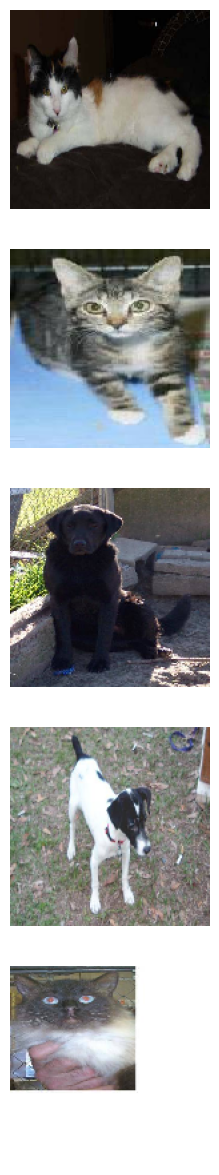

In [22]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [29]:
# 5
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=10,
    horizontal_flip=True)

Found 2000 images belonging to 2 classes.


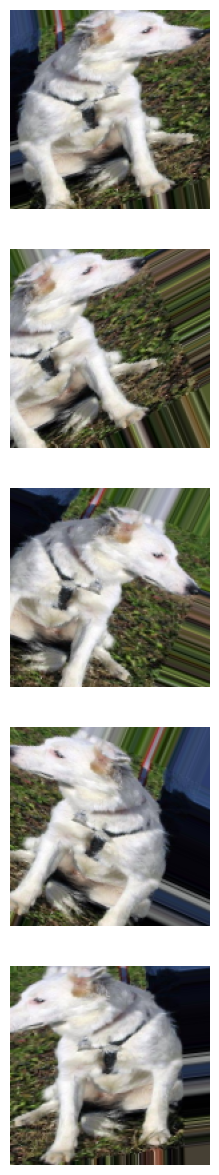

In [30]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [46]:
# 7

# Set up convolutional base
model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2))) # now 75,75
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2))) # now 37,37
model.add(Conv2D(64, (3,3)))

# dense layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 146, 146, 32)      2432      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 71, 71, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 35, 35, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 33, 33, 64)        18496     
                                                                 
 flatten_1 (Flatten)         (None, 69696)            

In [36]:
# 8

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [43]:
history = model.fit(train_data_gen, validation_data=val_data_gen, epochs=epochs)

Epoch 1/15
16/16 [==============================] - 12s 712ms/step - loss: 0.7114 - accuracy: 0.5080 - val_loss: 0.6885 - val_accuracy: 0.5230
Epoch 2/15
16/16 [==============================] - 14s 895ms/step - loss: 0.7006 - accuracy: 0.5260 - val_loss: 0.6768 - val_accuracy: 0.6180
Epoch 3/15
16/16 [==============================] - 14s 879ms/step - loss: 0.6828 - accuracy: 0.5625 - val_loss: 0.6708 - val_accuracy: 0.6070
Epoch 4/15
16/16 [==============================] - 14s 882ms/step - loss: 0.6950 - accuracy: 0.5365 - val_loss: 0.7100 - val_accuracy: 0.5030
Epoch 5/15
16/16 [==============================] - 14s 891ms/step - loss: 0.6989 - accuracy: 0.5240 - val_loss: 0.6791 - val_accuracy: 0.5390
Epoch 6/15
16/16 [==============================] - 14s 877ms/step - loss: 0.6845 - accuracy: 0.5650 - val_loss: 0.6684 - val_accuracy: 0.6360
Epoch 7/15
16/16 [==============================] - 14s 880ms/step - loss: 0.6763 - accuracy: 0.5830 - val_loss: 0.6522 - val_accuracy: 0.6190

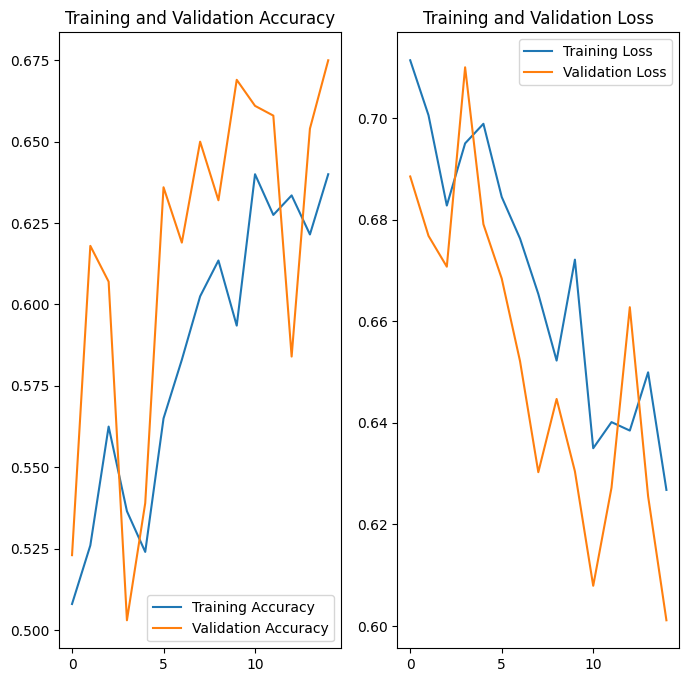

In [44]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [45]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

NameError: name 'probabilities' is not defined